# 0. Import libraries

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# 1. Explore data

In [103]:
# Import CSV 
def import_csv(path):
    """
    Imports a csv file

    Args:
        path (string): path of the csv file

    Output:
        Pandas DataFrame of the csv
    """
    return pd.read_csv(path)



In [104]:
# Load the data
df = import_csv("wfp-hungermap-data-for-mdg.csv")

In [105]:
# Visualize dataset
df.head()

,countrycode,countryname,adminone,adminlevel,population,date,datatype,fcs people,fcs prevalence,rcsi people,rcsi prevalence,health access people,health access prevalence,market access people,market access prevalence
0,#country+code,#country+name,#adm1+name,#meta+adminlevel,#population+total,#date,#data+type,#population+fcs,#indicator+fcs+prevalence,#population+rcsi,#indicator+rcsi+prevalence,#population+health_access,#indicator+health_access+prevalence,#population+market_access,#indicator+market_access+prevalence
1,MDG,Madagascar,NaN,national,NaN,2024-03-04,SURVEY,8456947,0.32215332807656305,7816509,0.2977569119407755,2155430,0.08210751797908643,3180077,0.12113974014886676
2,MDG,Madagascar,NaN,national,NaN,2024-03-03,SURVEY,8604019,0.32775579126651516,7708249,0.2936329211224791,2185552,0.08325496662992705,3222276,0.1227472490461335
3,MDG,Madagascar,NaN,national,NaN,2024-03-02,SURVEY,8654571,0.3296814856147151,7845463,0.29885986642190426,2227397,0.08484898329823913,3284548,0.12511939962610666
4,MDG,Madagascar,NaN,national,NaN,2024-03-01,SURVEY,8597649,0.327513141248951,7748351,0.2951605462736907,2175090,0.08285642813079001,3330646,0.12687541988738874


In [106]:
def remove_headtitle(df):
    """
    Removes the headtitle situated in index 0

    Args:
        df : Pandas DataFrame

    Output:
        DataFrame without the headtitle
    """
    df = df.iloc[1:, 1:]
    return df

# Remove headtitle
df = remove_headtitle(df)

In [107]:
# Show descriptive statistics
df.describe()

,countryname,adminone,adminlevel,population,date,datatype,fcs people,fcs prevalence,rcsi people,rcsi prevalence,health access people,health access prevalence,market access people,market access prevalence
count,1381,1320,1381,1320,1381,1381,1381,1381,1381,1381,1381,1381,1381,1381
unique,1,22,2,22,61,1,1002,1004,1005,1006,999,1002,997,1001
top,Madagascar,Alaotra Mangoro,subnational,1234447,2024-03-04,SURVEY,354702,0.28511028569545377,276340,0.24679253440656962,81552,0.05073115847558096,193113,0.12884774104615188
freq,1381,60,1320,60,23,1381,8,8,8,8,8,8,8,8


In [108]:
# Show info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 1 to 1381
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   countryname               1381 non-null   object
 1   adminone                  1320 non-null   object
 2   adminlevel                1381 non-null   object
 3   population                1320 non-null   object
 4   date                      1381 non-null   object
 5   datatype                  1381 non-null   object
 6   fcs people                1381 non-null   object
 7   fcs prevalence            1381 non-null   object
 8   rcsi people               1381 non-null   object
 9   rcsi prevalence           1381 non-null   object
 10  health access people      1381 non-null   object
 11  health access prevalence  1381 non-null   object
 12  market access people      1381 non-null   object
 13  market access prevalence  1381 non-null   object
dtypes: object(14)
memory usa

We need to change the date feature into datetime format for better manipulation.

In [109]:
def change_column_types(df):
    """
    Changes the column types to the corresponding type

    Args:
        df: Pandas DataFrame

    Output:
        DataFrame with changed column types
    """
    numerical_columns = ['population', 'fcs people', 'fcs prevalence', 'rcsi people', 'rcsi prevalence', 'health access people', 
                         'health access prevalence', 'market access people', 'market access prevalence']
    datetype_columns = ['date']

    format_code = "%Y-%m-%d"

    for x in numerical_columns:
        df[x] = pd.to_numeric(df[x])

    for y in datetype_columns:
        df[y] = pd.to_datetime(df[y], format=format_code)

    return df

# Change column types
df = change_column_types(df)

In [110]:
# Check for missing values
df.isnull().sum()

countryname                  0
adminone                    61
adminlevel                   0
population                  61
date                         0
datatype                     0
fcs people                   0
fcs prevalence               0
rcsi people                  0
rcsi prevalence              0
health access people         0
health access prevalence     0
market access people         0
market access prevalence     0
dtype: int64

## 1.1) Univariate Analysis

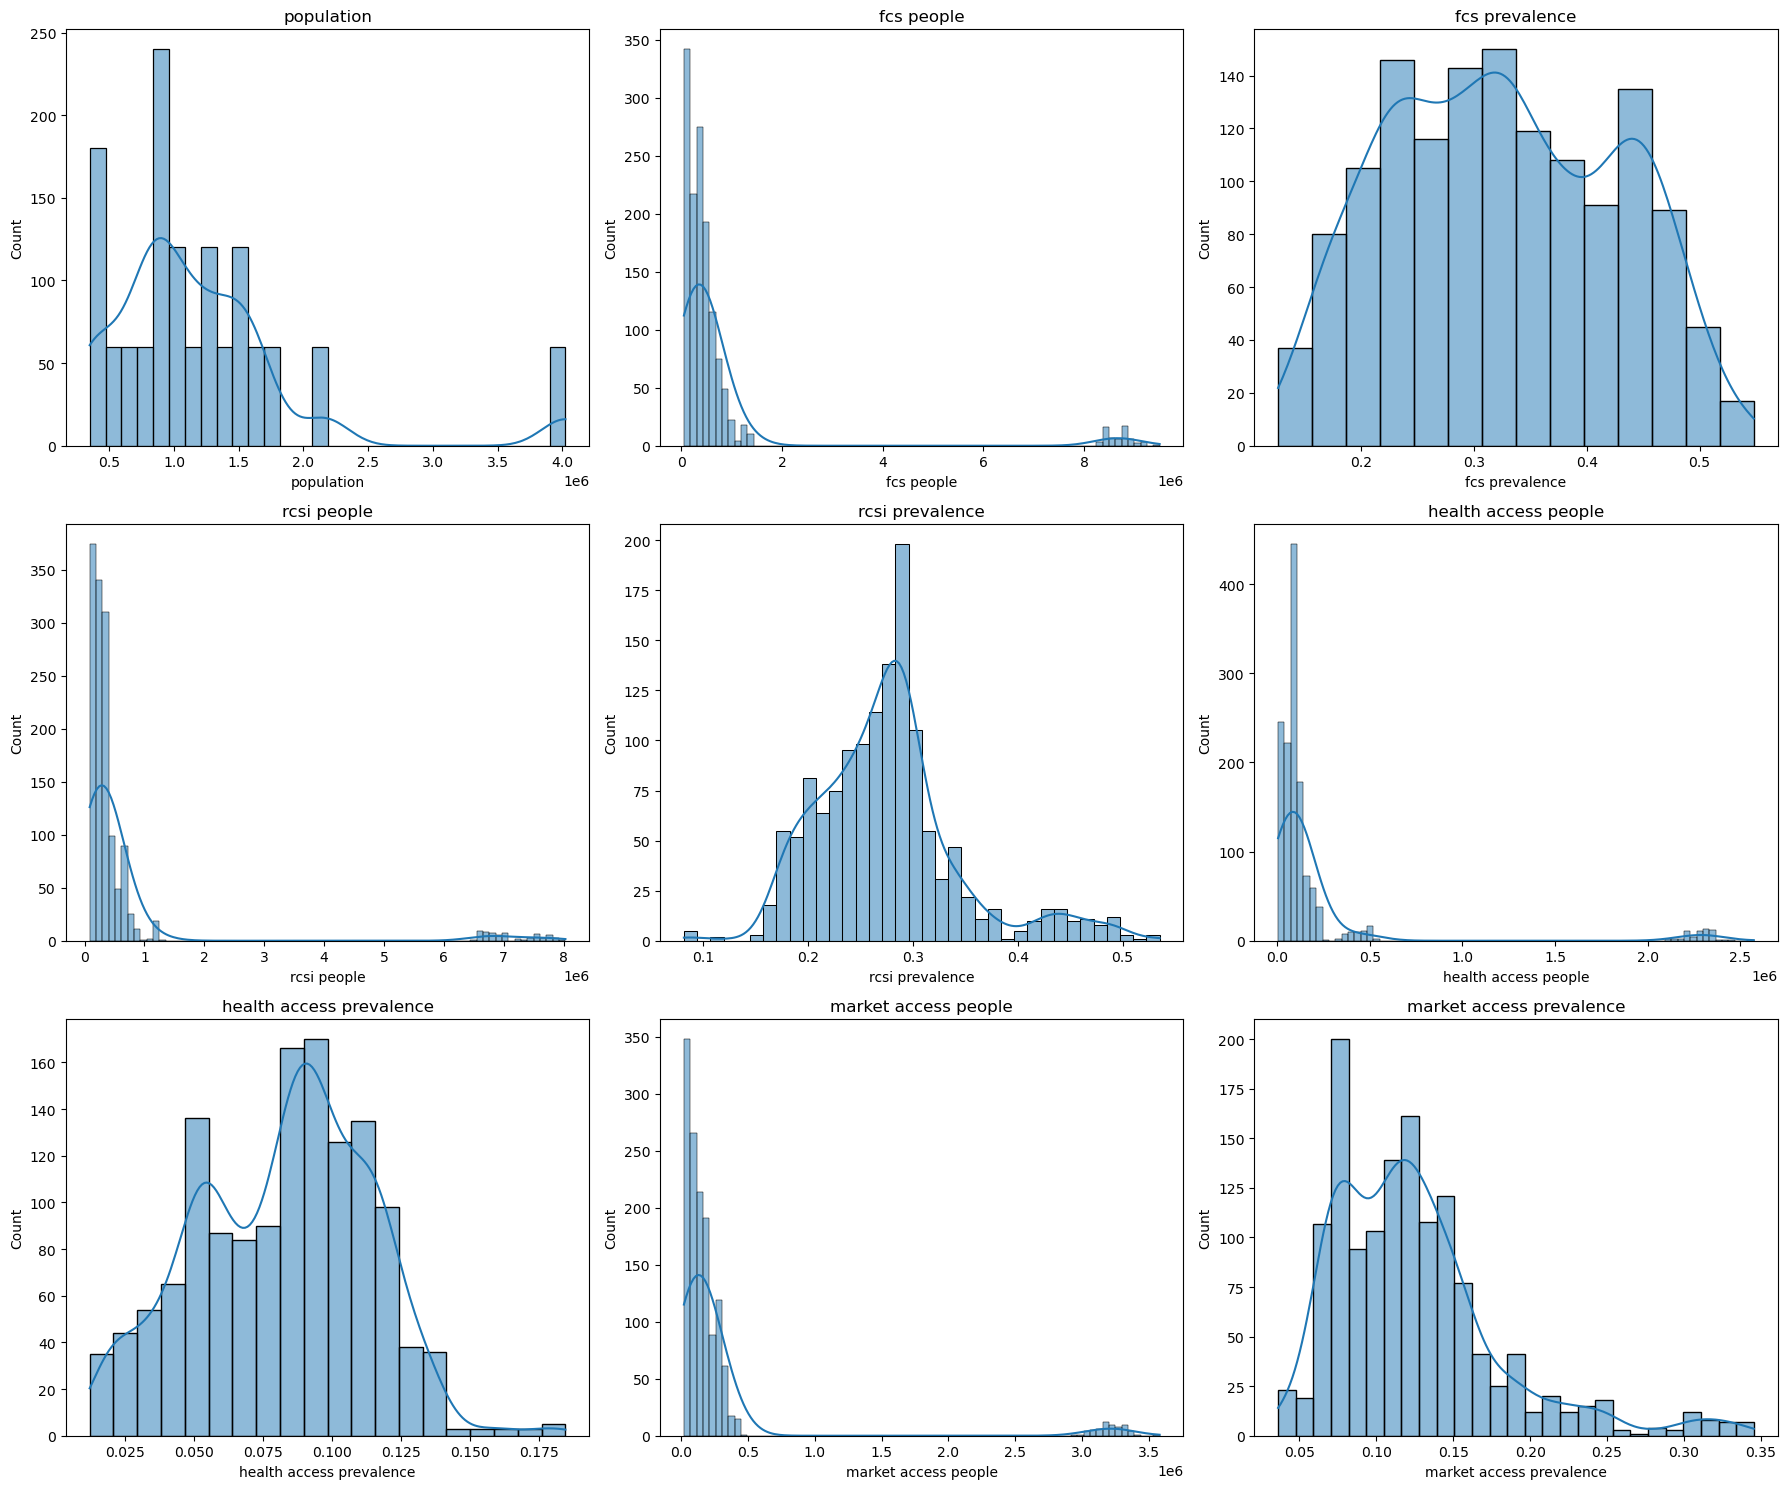

In [111]:
numerical_columns = ['population', 'fcs people', 'fcs prevalence', 'rcsi people', 'rcsi prevalence', 'health access people', 
                         'health access prevalence', 'market access people', 'market access prevalence']

plt.figure(figsize=(18, 15))
for i, x in enumerate(numerical_columns): # Get index and column name
    plt.subplot(3, 3, i+1) # Create a 3x3 grid of subplots 
    sns.histplot(df[x], kde=True)
    plt.title(x)
plt.tight_layout() # Adjust subplots to fit in figure area
plt.show()


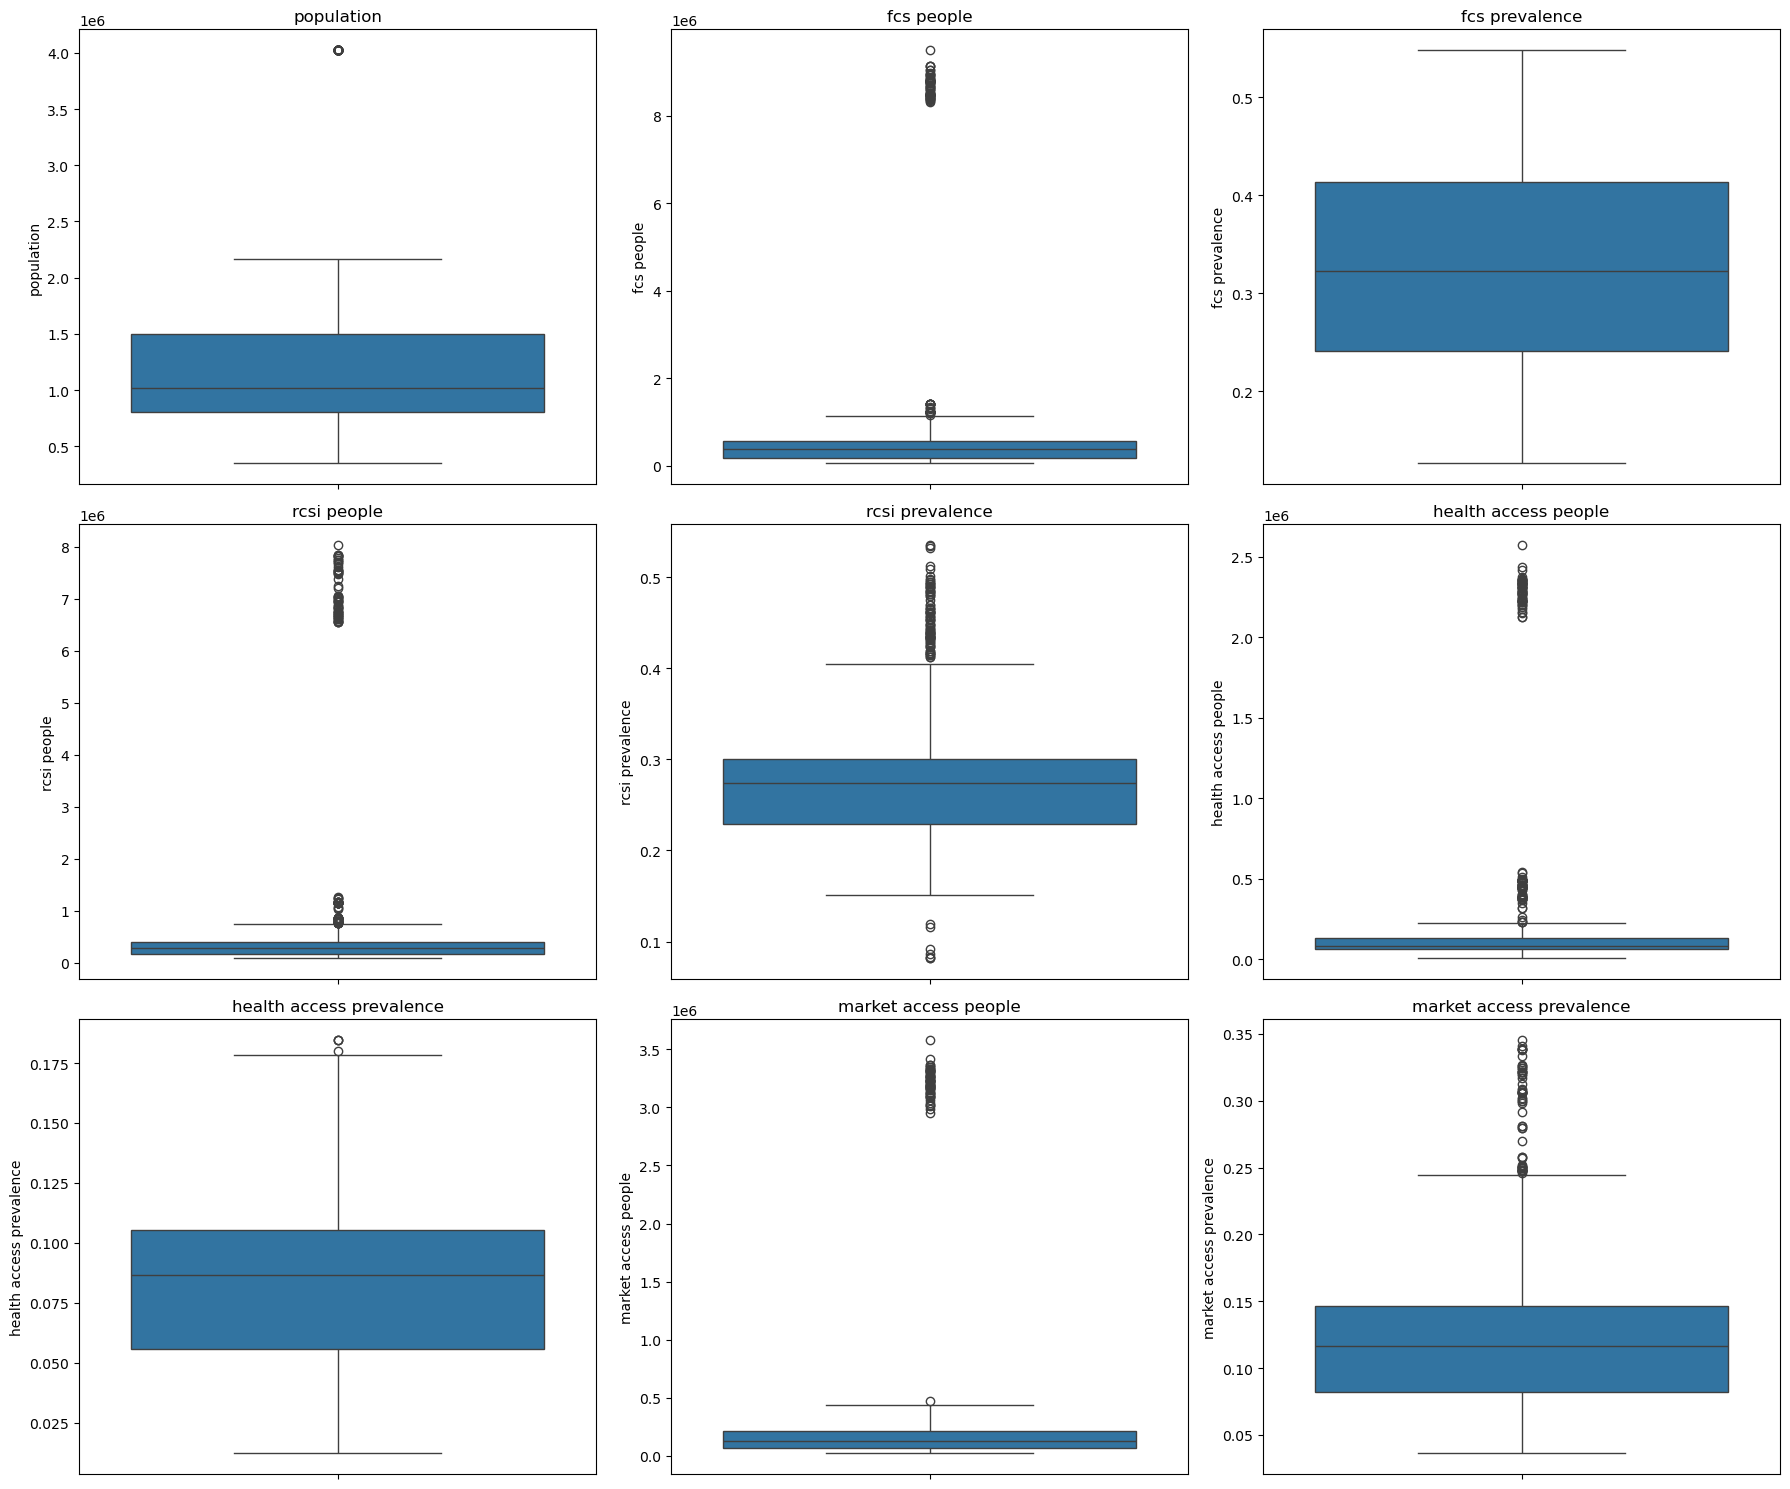

In [112]:
numerical_columns = ['population', 'fcs people', 'fcs prevalence', 'rcsi people', 'rcsi prevalence', 'health access people', 
                         'health access prevalence', 'market access people', 'market access prevalence']

plt.figure(figsize=(18, 15))
for i, x in enumerate(numerical_columns): # Get index and column name
    plt.subplot(3, 3, i+1) # Create a 3x3 grid of subplots 
    sns.boxplot(y=df[x])
    plt.title(x)
plt.tight_layout() # Adjust subplots to fit in figure area
plt.show()


# 2. Data cleaning

## 2.1) Replacing missing values

After understanding the values in our dataset, intuitevly we want to replace the population that's missing by using the ratio given by the different metrics (ex: population, fcs prevalence, fc people) With these we can calculate the missing values of the population

In [113]:
df['total_population'] = df['fcs people'] / df['fcs prevalence']
df

,countryname,adminone,adminlevel,population,date,datatype,fcs people,fcs prevalence,rcsi people,rcsi prevalence,health access people,health access prevalence,market access people,market access prevalence,total_population
1,Madagascar,NaN,national,NaN,2024-03-04,SURVEY,8456947,0.322153,7816509,0.297757,2155430,0.082108,3180077,0.121140,2.625131e+07
2,Madagascar,NaN,national,NaN,2024-03-03,SURVEY,8604019,0.327756,7708249,0.293633,2185552,0.083255,3222276,0.122747,2.625131e+07
3,Madagascar,NaN,national,NaN,2024-03-02,SURVEY,8654571,0.329681,7845463,0.298860,2227397,0.084849,3284548,0.125119,2.625131e+07
4,Madagascar,NaN,national,NaN,2024-03-01,SURVEY,8597649,0.327513,7748351,0.295161,2175090,0.082856,3330646,0.126875,2.625131e+07
5,Madagascar,NaN,national,NaN,2024-02-29,SURVEY,8578497,0.326784,7827478,0.298175,2126254,0.080996,3322466,0.126564,2.625131e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,Madagascar,Menabe,subnational,711639.0,2024-01-05,SURVEY,99807,0.140249,178358,0.250630,71084,0.099888,91533,0.128623,7.116390e+05
1378,Madagascar,Sava,subnational,1178796.0,2024-01-05,SURVEY,477003,0.404653,253350,0.214923,158273,0.134267,144382,0.122483,1.178796e+06
1379,Madagascar,Sofia,subnational,1498769.0,2024-01-05,SURVEY,468533,0.312612,336681,0.224638,99133,0.066143,229278,0.152978,1.498769e+06
1380,Madagascar,Vakinankaratra,subnational,2167330.0,2024-01-05,SURVEY,891656,0.411408,662316,0.305591,229429,0.105858,327763,0.151229,2.167330e+06


The total_population column given we've created seems to be the population of the whole country. We will need to verify this by adding up the population of all the regions per date and compare with the total_population we created

In [114]:
def test_subnational_population_consistency(df, expected_sum):
    """
    Tests if the sum of sub-national populations is consistent across all dates.

    Args:
        df (pd.DataFrame): The cleaned WFP HungerMap DataFrame.
        expected_sum (float): The expected sum of sub-national populations.

    Returns:
        dict: A dictionary containing the consistency test results.
    """
    # Filter for only subnational data
    subnational_df = df[df['adminlevel'] == 'subnational']

    # Group by date and sum the population for each date
    daily_sums = subnational_df.groupby('date')['population'].sum()

    # Compare each daily sum to the expected sum using floating point comparison
    is_consistent = np.isclose(daily_sums, expected_sum)

    # Calculate consistency metrics
    total_dates = len(daily_sums)
    consistent_dates = np.sum(is_consistent)
    consistency_percentage = (consistent_dates / total_dates) * 100
    
    return {
        'total_dates': total_dates,
        'consistent_dates': consistent_dates,
        'consistency_percentage': f"{consistency_percentage:.2f}%",
        'all_consistent': consistent_dates == total_dates
    }

# By looking at the cell above, we want to check if the sum of sub-national populations is equal to 26251310.0
a = test_subnational_population_consistency(df, 26251310.0)
a

{'total_dates': 60,
 'consistent_dates': np.int64(60),
 'consistency_percentage': '100.00%',
 'all_consistent': np.True_}

In [115]:
# Hard Coded
def add_coordinates(df):
    """
    Add geo coordinates to each region

    Args:
        df : Pandas DataFrame

    Output:
        Enriched DataFrame with latitude and longitude columns
    """
    # Approximate coordinates
    region_coords = {
        'Diana': [-12.27, 49.28],
        'Sava': [-14.28, 49.95],
        'Itasy': [-19.01, 46.78],
        'Analamanga': [-18.87, 47.50], 
        'Vakinankaratra': [-19.86, 47.03],
        'Bongolava': [-18.57, 46.06],
        'Sofia': [-14.62, 47.98],
        'Boeny': [-15.98, 46.54],
        'Betsiboka': [-16.96, 46.85],
        'Melaky': [-17.56, 44.83],
        'Alaotra Mangoro': [-17.82, 48.43],
        'Atsinanana': [-18.78, 48.97],
        'Analanjirofo': [-16.54, 49.46],
        'Amoron I Mania': [-20.54, 46.79], 
        "Amoron'i Mania": [-20.54, 46.79], 
        'Haute Matsiatra': [-21.45, 47.08],
        'Vatovavy': [-20.80, 48.20],
        'Fitovinany': [-21.80, 47.70],
        'Vatovavy Fitovinany': [-21.30, 47.90], 
        'Atsimo Atsinanana': [-23.40, 47.36],
        'Ihorombe': [-22.50, 46.00],
        'Menabe': [-20.01, 45.00],
        'Atsimo Andrefana': [-23.35, 43.66],
        'Androy': [-24.89, 45.72],
        'Anosy': [-24.50, 46.50]
    }
    
    df['lat'] = df['adminone'].map(lambda x: region_coords.get(x, [None, None])[0])
    df['lon'] = df['adminone'].map(lambda x: region_coords.get(x, [None, None])[1])
    
    
    return df


df = add_coordinates(df)

The sum of the sub-national populations in our dataset is consistently 26,251,310.

In [116]:
def replace_nan(df):
    """
    Replaces the missing values with the following values :
        - for adminone replace nan with 'country'
        - for population replace with the calculated population from the followinf equation :   df['fcs people'] / df['fcs prevalence']

    Args:
        df : Pandas DataFrame

    Outputs:
        A DataFrame with replaced missing values
    """
    # Replace NaN in 'adminone' with 'country'
    df['adminone'] = df['adminone'].fillna('country')
    
    # Calculate population from survey data where missing
    df['population'] = df['population'].fillna(
        df['fcs people'] / df['fcs prevalence']
    )
    
    return df

df = replace_nan(df)

In [117]:
# Remove the test population column
df.drop('total_population', axis=1, inplace=True)

## 2.2) Remove outliers

In [118]:
# Check unique dates
df['date'].unique()

<DatetimeArray>
['2024-03-04 00:00:00', '2024-03-03 00:00:00', '2024-03-02 00:00:00',
 '2024-03-01 00:00:00', '2024-02-29 00:00:00', '2024-02-28 00:00:00',
 '2024-02-27 00:00:00', '2024-02-26 00:00:00', '2024-02-25 00:00:00',
 '2024-02-24 00:00:00', '2024-02-23 00:00:00', '2024-02-22 00:00:00',
 '2024-02-21 00:00:00', '2024-02-20 00:00:00', '2024-02-19 00:00:00',
 '2024-02-18 00:00:00', '2024-02-17 00:00:00', '2024-02-16 00:00:00',
 '2024-02-15 00:00:00', '2024-02-14 00:00:00', '2024-02-13 00:00:00',
 '2024-02-12 00:00:00', '2024-02-11 00:00:00', '2024-02-10 00:00:00',
 '2024-02-09 00:00:00', '2024-02-08 00:00:00', '2024-02-07 00:00:00',
 '2024-02-06 00:00:00', '2024-02-05 00:00:00', '2024-02-04 00:00:00',
 '2024-02-03 00:00:00', '2024-02-02 00:00:00', '2024-02-01 00:00:00',
 '2024-01-31 00:00:00', '2024-01-30 00:00:00', '2024-01-29 00:00:00',
 '2024-01-28 00:00:00', '2024-01-27 00:00:00', '2024-01-26 00:00:00',
 '2024-01-25 00:00:00', '2024-01-24 00:00:00', '2024-01-23 00:00:00',
 '20

We can see there is only one date in 2023, we will remove it

In [119]:
# Remove the only date in 2023
def remove_outlier(df):
    target = pd.to_datetime("2023-12-04") # Make target into a datetime type variable
    idx = df.index[df["date"] == target] # Get the index of the row where the date == target
    return df.drop(idx)

df = remove_outlier(df)

# Extracting key informations : 

### 1. Visualising the regions with the biggest proportion of people with poor/borderline fcs on average

In [120]:
### 1. The region with the biggest proportion of people with poor/borderline fcs on average

def avg_fcs_people(df):
    """
    Plots a bar chart of the average FCS prevalence by region.

    Args:
        df: Pandas DataFrame
    
    """
    avg = df['fcs prevalence'].groupby(df['adminone']).mean().sort_values(ascending=False)
    fig = px.bar(
        avg,
        x=avg.index,
        y=avg.values,
        title="Region with the biggest proportion of people with poor/borderline FCS on average",
        labels={"x": "Region", "y": "FCS prevalence average"}
    )
    fig.update_layout(xaxis_tickangle=45)
    fig.show()

avg_fcs_people(df)

We can see that for the whole country there is just over a little of a third of the population that have poor/borderline fcs

### 2. Visaulising data clustering using data transformation techniques (Standardization)

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [122]:
df_cluster = df.copy()

def average_by_region(df):
    """
    Averages the prevalence columns by region (adminone)

    Args:
        df : Pandas DataFrame

    Outputs:
        A DataFrame with the average prevalence by region
    """

    cols = [
        "fcs prevalence",
        "rcsi prevalence",
        "health access prevalence",
        "market access prevalence"
    ]
    
    df_avg = (
        df.groupby("adminone")[cols]
        .mean()
        .reset_index()
    )
    
    return df_avg

df_cluster = average_by_region(df)


def standardize_and_cluster(df, k):
    """
    Standardizes a specified column in the DataFrame using Z-score normalization.

    Args:
        df: Pandas DataFrame
        column_names: list of column names to be standardized

    Output:
        DataFrame with standardized columns
    """
    column_names = [x for x in df.columns if x != "adminone"]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[column_names])

    # Clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Return df with a cluster column
    df["cluster"] = clusters

    return df, scaler, kmeans



df_cluster, _, _ = standardize_and_cluster(df_cluster, k=4)

df_cluster

c:\Users\njee2\anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,adminone,fcs prevalence,rcsi prevalence,health access prevalence,market access prevalence,cluster
0,Alaotra Mangoro,0.200899,0.250573,0.049130,0.081785,2
1,Amoron I Mania,0.430244,0.301818,0.079405,0.063414,0
2,Analamanga,0.281576,0.228026,0.109211,0.077268,3
3,Analanjirofo,0.274160,0.216751,0.078948,0.102272,3
4,Androy,0.466242,0.352888,0.106889,0.294162,1
5,Anosy,0.458723,0.455031,0.127414,0.197568,1
6,Atsimo Andrefana,0.351875,0.402102,0.042016,0.154179,1
7,Atsimo Atsinanana,0.490588,0.303789,0.100986,0.159786,1
8,Atsinanana,0.337280,0.238202,0.090901,0.140456,0
9,Betsiboka,0.233059,0.286386,0.047306,0.110243,2


In [123]:
import plotly.express as px

def visualize_clusters(df):
    """
    Visualizes the clusters using bar plots for each feature with multiple colors.

    Args:
        df: Pandas DataFrame with cluster labels

    Outputs:
        Bar plots for each feature showing the average values per cluster
        A dictionary of figures
    """
    cluster = df.groupby('cluster')
    columns = ["fcs prevalence", "rcsi prevalence", "health access prevalence", "market access prevalence"]

    figures = {}

    for x in columns:
        cluster_means = cluster[x].mean().reset_index()  
        fig = px.bar(
            cluster_means,
            x='cluster', # cluster labels
            y=x, # mean values
            color='cluster',  # Use cluster as color
            title=f"Clusters with the biggest proportion of people with poor/borderline {x} on average",
            labels={"cluster": "Cluster", x: f"{x} average"},
            
        )
        fig.update_layout(xaxis_tickangle=45)
        fig.show()

        figures[x] = fig
    
    return figures



cluster_figures = visualize_clusters(df_cluster)

With the help of the visualizations we can clearly distinguish the different groups:

* Cluster 0 : "Food insecure group" : Regions with big food problems but has better infrastructures than cluster 1 (better health and market access)

* Cluster 1 : The most vulnerable group : highest score on all metrics (except health by a small margin)

* Cluster 2 : The "The Stable group" : Have relatively "good" scores across all metrics

* Cluster 3 : The "Health deprived group" : Has the worst health access but relatively well fed and and has good market access



### Temporal Forecast of Market Access

This indicator predicts the future evolution of market access at the national level.
The time series is built by aggregating daily values for the entire country.

An ARIMA model is used to capture temporal dependencies and forecast future values.
This prediction helps anticipate changes in accessibility, which is a key driver of food security.

In [124]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.express as px
import plotly.graph_objects as go

def prepare_market_access_ts(df):
    """
    Build a daily time series of 'market access people' at country level.
    Input: full dataframe
    Output: pandas Series indexed by date (daily frequency)
    """
    ts = (
        df[df["adminone"] == "country"]
        .groupby("date")["market access people"]
        .mean()
        .sort_index()
    )
    ts = ts.asfreq("D")  # daily freq
    return ts

In [125]:
def find_best_arima_order(ts, test_size=14, p_max=3, d_values=(0,1), q_max=3):
    """
    Select ARIMA(p,d,q) by minimizing RMSE on a hold-out split.
    Returns: best_order, metrics dict, all_results list
    """
    ts = ts.dropna()
    train, test = ts.iloc[:-test_size], ts.iloc[-test_size:]

    best = {"order": None, "rmse": np.inf, "mae": np.inf}
    all_results = []

    for p, d, q in itertools.product(range(p_max+1), d_values, range(q_max+1)):
        if (p, d, q) == (0, 0, 0):
            continue

        # Constant only if d==0 
        trend = "c" if d == 0 else "n"

        try:
            model = ARIMA(
                train,
                order=(p, d, q),
                trend=trend,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            fit = model.fit()
            pred = fit.forecast(steps=test_size)

            mae = mean_absolute_error(test, pred)
            rmse = np.sqrt(mean_squared_error(test, pred))

            all_results.append({"order": (p,d,q), "trend": trend, "aic": fit.aic, "mae": mae, "rmse": rmse})

            if rmse < best["rmse"]:
                best.update({"order": (p, d, q), "rmse": rmse, "mae": mae})

        except Exception:
            continue

    return best["order"], best, pd.DataFrame(all_results).sort_values("rmse")

In [126]:
def fit_and_forecast_arima(ts, order, steps=14):
    """
    Fit ARIMA on full series and forecast future steps with 95% CI.
    Returns: forecast_mean (Series), conf_int (DataFrame), fitted_model
    """
    d = order[1]
    trend = "c" if d == 0 else "n"

    model = ARIMA(
        ts,
        order=order,
        trend=trend,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    fit = model.fit()

    res = fit.get_forecast(steps=steps)
    fc_mean = res.predicted_mean
    fc_ci = res.conf_int(alpha=0.05)

    return fc_mean, fc_ci, fit

In [127]:
def plot_forecast_with_ci(ts, fc_mean, fc_ci, title="Market Access People – Observed vs Forecast"):
    df_obs = ts.reset_index()
    df_obs.columns = ["date", "value"]

    df_fc = fc_mean.reset_index()
    df_fc.columns = ["date", "forecast"]

    lower_col = fc_ci.columns[0]
    upper_col = fc_ci.columns[1]

    fig = go.Figure()

    # Observed
    fig.add_trace(go.Scatter(x=df_obs["date"], y=df_obs["value"], mode="lines", name="Observed"))

    # Forecast mean
    fig.add_trace(go.Scatter(x=df_fc["date"], y=df_fc["forecast"], mode="lines", name="Forecast"))

    # Confidence interval
    fig.add_trace(go.Scatter(
        x=df_fc["date"], y=fc_ci[upper_col],
        mode="lines", line=dict(width=0),
        showlegend=False, name="Upper CI"
    ))
    fig.add_trace(go.Scatter(
        x=df_fc["date"], y=fc_ci[lower_col],
        mode="lines", line=dict(width=0),
        fill="tonexty", 
        showlegend=True, name="95% CI"
    ))

    fig.update_layout(title=title, xaxis_title="date", yaxis_title="market access people")
    return fig
    
ts_market = prepare_market_access_ts(df)

best_order, best_info, grid_df = find_best_arima_order(ts_market, test_size=14, p_max=3, d_values=(0,1), q_max=3)
print("Best ARIMA order, by RMSE on last 14 days:", best_order)
print("   MAE:", round(best_info["mae"], 2), " RMSE:", round(best_info["rmse"], 2))

forecast_mean, forecast_ci, fitted = fit_and_forecast_arima(ts_market, best_order, steps=14)
fig = plot_forecast_with_ci(ts_market, forecast_mean, forecast_ci)
fig.show()


c:\Users\njee2\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\njee2\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best ARIMA order, by RMSE on last 14 days: (3, 0, 3)
   MAE: 41796.71  RMSE: 57797.73


c:\Users\njee2\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



### Spatial Visualisations of Prevalence metrics

This indicator illustrates the variations of prevalence metrics at the national level.
The time series is meant to reveal if certain areas are affected more than others using colored and sized bubbles for gravity and population amount.

The First Step was to Enrich the dataFrame using geo coordinates


In [136]:
# Hard Coded
def add_coordinates(df):
    
    # Coordonnées centrales approximatives des 23 régions
    region_coords = {
        'Diana': [-12.27, 49.28],
        'Sava': [-14.28, 49.95],
        'Itasy': [-19.01, 46.78],
        'Analamanga': [-18.87, 47.50], # Antananarivo
        'Vakinankaratra': [-19.86, 47.03],
        'Bongolava': [-18.57, 46.06],
        'Sofia': [-14.62, 47.98],
        'Boeny': [-15.98, 46.54],
        'Betsiboka': [-16.96, 46.85],
        'Melaky': [-17.56, 44.83],
        'Alaotra Mangoro': [-17.82, 48.43],
        'Atsinanana': [-18.78, 48.97],
        'Analanjirofo': [-16.54, 49.46],
        'Amoron I Mania': [-20.54, 46.79], 
        "Amoron'i Mania": [-20.54, 46.79], 
        'Haute Matsiatra': [-21.45, 47.08],
        'Vatovavy': [-20.80, 48.20],
        'Fitovinany': [-21.80, 47.70],
        'Vatovavy Fitovinany': [-21.30, 47.90], # Ancienne région parfois groupée
        'Atsimo Atsinanana': [-23.40, 47.36],
        'Ihorombe': [-22.50, 46.00],
        'Menabe': [-20.01, 45.00],
        'Atsimo Andrefana': [-23.35, 43.66],
        'Androy': [-24.89, 45.72],
        'Anosy': [-24.50, 46.50]
    }
    
    df['lat'] = df['adminone'].map(lambda x: region_coords.get(x, [None, None])[0])
    df['lon'] = df['adminone'].map(lambda x: region_coords.get(x, [None, None])[1])
    
    
    return df

df = add_coordinates(df)

In [149]:
metrics_to_plot = [
    "fcs prevalence", 
    "rcsi prevalence",      
    "health access prevalence", 
    "market access prevalence"
]


def create_animation_figure(metric):
    max_val = df[metric].max()
    min_val = df[metric].min()

    fig = px.scatter_mapbox(
        df,
        lat="lat",
        lon="lon",
        size="population",
        color=metric,
        animation_frame="date",
        animation_group="adminone",
        color_continuous_scale="RdYlGn_r", 
        range_color=[min_val, max_val],
        size_max=50, 
        height=700, 
        zoom=4.4,
        center={"lat": -18.7669, "lon": 46.8691},
        mapbox_style="open-street-map",
        title=f"Évolution Temporelle : {metric.title()}",
        hover_name="adminone",
        hover_data={metric: ':.2f', 'population': True, 'lat': False, 'lon': False, 'date': False}
    )

    fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 250
    return fig

#### Temporary View Based from Averaged Metrics

In [ ]:
coords_ref = df[['adminone', 'lat', 'lon','population']].drop_duplicates()
df_avg = average_by_region(df)
df_final_map = df_avg.merge(coords_ref, on='adminone', how='left')



for metric in metrics_to_plot:
    
    
    print(f"Génération de la carte pour : {metric}...")
    
    fig = px.scatter_mapbox(
        df_final_map,
        lat="lat",
        lon="lon",
        
       
        size="population",         
        color=metric,             
        
        color_continuous_scale="RdYlGn_r", #From Green (good) to Red (bad)
        
        size_max=50,
        zoom=3.8,
        center={"lat": -18.7669, "lon": 46.8691},
        mapbox_style="open-street-map",
        
        title=f"Répartition Spatiale Moyenne : {metric.title()}",
        hover_name="adminone",
        hover_data={metric: ':.2f', 'population': True, 'lat': False, 'lon': False}
    )

    fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
    fig.show()
        

Génération de la carte pour : fcs prevalence...


C:\Users\njee2\AppData\Local\Temp\ipykernel_2908\3130880043.py:12: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Génération de la carte pour : rcsi prevalence...


C:\Users\njee2\AppData\Local\Temp\ipykernel_2908\3130880043.py:12: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Génération de la carte pour : health access prevalence...


C:\Users\njee2\AppData\Local\Temp\ipykernel_2908\3130880043.py:12: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Génération de la carte pour : market access prevalence...


C:\Users\njee2\AppData\Local\Temp\ipykernel_2908\3130880043.py:12: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



## Correlation Analysis of Food Insecurity and Access Indicators

In [131]:
df_avg = average_by_region(df)

cols_prev = [
    "fcs prevalence",
    "rcsi prevalence",
    "health access prevalence",
    "market access prevalence"
]

fig = px.imshow(
    df_avg[cols_prev].corr(),
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Corrélation between prevalance"
)
fig.update_layout(width=900, height=900)
fig.show()



The correlation analysis between the prevalence indicators reveals several key insights:

FCS prevalence and rCSI prevalence are moderately correlated (~0.56), indicating that poorer food consumption is associated with increased use of coping strategies.

Market access prevalence shows a moderate correlation with both food security indicators (0.52 with FCS and 0.60 with rCSI), suggesting that regions with limited market access also tend to experience higher levels of food insecurity.

In contrast, health access prevalence displays very weak correlations with all other indicators, meaning it does not appear to explain regional variations in food insecurity in this dataset.

# Dashbord

In [150]:
from dash import Dash, html, dcc,Input, Output

app = Dash(__name__)

best_order, best_info, grid_df = find_best_arima_order(
    ts_market, test_size=14, p_max=3, d_values=(0, 1), q_max=3
)
forecast_mean, forecast_ci, fitted = fit_and_forecast_arima(ts_market, best_order, steps=14)
fig_forecast = plot_forecast_with_ci(
    ts_market, forecast_mean, forecast_ci,
    title="Market Access People – Observed vs Forecast"
)

app.layout = html.Div(style={"margin": "40px"}, children=[

    html.H1("Madagascar Food Security Dashboard"),

    html.Div([
        html.H3("Project Information"),
        html.P("Team Members: Louis, Antoine, Njee, Mehdi, Marwan"),
        html.P("Dataset: WFP Food Security Indicators for Madagascar"),
        html.P("Objective: Analyze spatial and temporal patterns of food insecurity across Malagasy regions."),
    ], style={
        "backgroundColor": "#e6f2ff",
        "padding": "15px",
        "borderRadius": "8px",
        "marginBottom": "40px"
    }),

    # 1 — Grouping Query
    html.H2("1. FCS Grouping Query Result"),
    dcc.Graph(figure=avg_fcs_people(df)),

    # 2 — Cluster Visualizations
    html.H2("6. Cluster Profiles"),

    html.Div(
        children=[
            html.Div(
                children=[
                    html.H4(f"Clusters – {name.title()}"),
                    dcc.Graph(figure=fig)
                ],
                style={
                    "width": "48%",
                    "display": "inline-block",
                    "padding": "10px"
                }
            )
            for name, fig in cluster_figures.items()
        ]
    ),


    # 3 — Temporal Feature
    html.H2("5. Temporal Forecast (Market Access – ARIMA)"),
    dcc.Graph(figure=fig_forecast),

    # 4 — Animated Map
    html.H2("2. Animated Spatial/Temporal Visualization"),
    
    html.Div([
        html.Label("Choose a metric to display :", style={'fontWeight': 'bold'}),
        dcc.Dropdown(
            id='map-metric-dropdown',
            options=[{'label': m.title(), 'value': m} for m in metrics_to_plot],
            value=metrics_to_plot[0], 
            clearable=False,
            style={'width': '50%'}
        ),
    ], style={'marginBottom': '20px'}),

    dcc.Loading(
        id="loading-map",
        type="default",
        children=dcc.Graph(id='animated-map-graph')
    ),

])

@app.callback(
    Output('animated-map-graph', 'figure'),
    Input('map-metric-dropdown', 'value')
)
def update_map(selected_metric):
    return create_animation_figure(selected_metric)


app.run(debug=False, port=8052)


c:\Users\njee2\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\njee2\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\njee2\anaconda3\envs\geo_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



C:\Users\njee2\AppData\Local\Temp\ipykernel_2908\998894990.py:13: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

